# This notebook fits 2D PCH histograms
Note that you need to have simulation.csv.zip from the sim_fcs simulation (or from experimental data) loaded into your workspace.  Note that 2D PCH calculations become quite slow for large photon counts (>10).
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/fit_pch2d.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis_utils as simutils
import scipy.optimize as so
import matplotlib.colors as colors

In [2]:
simdf=pd.read_csv('simulation.csv.zip',index_col=0)

In [3]:
simdf.head()

,x,ch1,ch2
0,0.00000,0,0
1,0.00005,1,1
2,0.00010,3,3
3,0.00015,3,4
4,0.00020,1,3


In [4]:
avgint1=simdf['ch1'].mean()
nbbright1=simutils.var(simdf['ch1'])/avgint1-1
nbnum1=avgint1/nbbright1
avgint2=simdf['ch2'].mean()
nbbright2=simutils.var(simdf['ch2'])/avgint2-1
nbnum2=avgint2/nbbright2
avgintcc=np.sqrt(simdf['ch1'].mean()*simdf['ch2'].mean())
nbbrightcc=simutils.covar(simdf['ch1'],simdf['ch2'])/avgintcc
nbnumcc=avgintcc/nbbrightcc
gval=0.3536
print('channel1:','intensity',avgint1,'brightness',nbbright1/gval,'number',nbnum1*gval)
print('channel2:','intensity',avgint2,'brightness',nbbright2/gval,'number',nbnum2*gval)
print('crosscorr:','brightness',nbbrightcc/gval,'number',nbnumcc*gval)

channel1: intensity 0.5734710693359375 brightness 1.0017975298494282 number 0.572442087596414
channel2: intensity 0.282196044921875 brightness 0.9317358315939759 number 0.3028713025226318
crosscorr: brightness 0.6956138628623066 number 0.5783130460214215


In [5]:
simutils.pch2dsizes=[10,10] #this is important to tell the fitting class our dimensions
pch2d,xvals,yvals=np.histogram2d(simdf['ch1'],simdf['ch2'],bins=[np.arange(11),np.arange(11)])
normpch2d=pch2d.astype(float)
totint=normpch2d.sum()
normpch2d/=totint
xvals=xvals[:-1]
yvals=yvals[:-1]

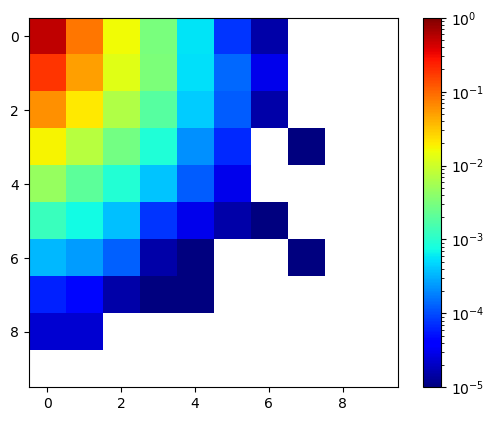

In [6]:
plt.imshow(normpch2d, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()

In [7]:
gparams=[0.0, 0.0, 1.0, 1.0, 0.7,0.0,1.0,0.5]
#gparams=[0.0, 0.0, 0.1, 0.1, 0.5,0.1,0.1,0.5]

In [8]:
fitxvals=np.arange(np.prod(pch2d.shape))
pchsim=simutils.pchfunc2d(fitxvals,*gparams).reshape(pch2d.shape)

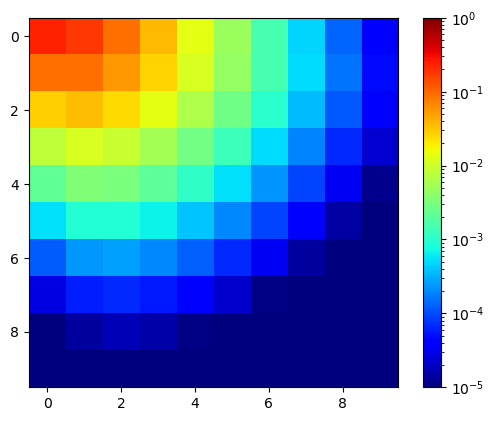

In [10]:
plt.imshow(pchsim, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()

In [11]:
weights=simutils.getpchweights(pch2d.flatten())

In [12]:
#params are backa, backb, brighta1,brightb1,n1,...
#where a and b are the channels and 1... is the species
guessparams=[0.0, 0.0, 1.0, 1.0, 0.7,0.0,1.0,0.5]
ulims=[0.001,0.001,4.0,4.0,2.0,4.0,4.0,2.0]
llims=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [13]:
fparams,fcov=so.curve_fit(simutils.pchfunc2d,fitxvals,normpch2d.flatten(),
             p0=guessparams,sigma=1.0/weights,bounds=(llims,ulims),method='trf')
print(fparams)
fit=simutils.pchfunc2d(fitxvals,*fparams).reshape(normpch2d.shape)

[1.00000000e-03 3.67545828e-14 9.84355351e-01 1.81306446e-02
 2.99102336e-01 9.75989707e-01 9.80718189e-01 2.83148892e-01]


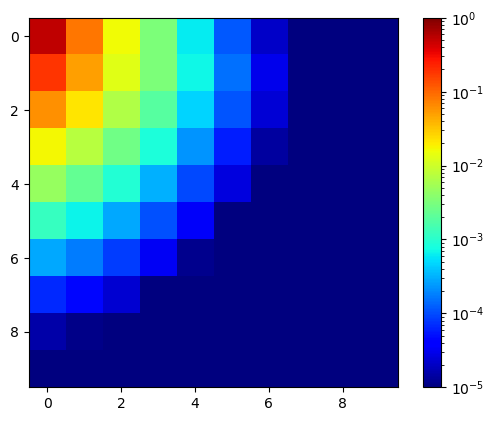

In [14]:
plt.imshow(fit, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()